In [66]:
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
sns.set()
sns.set_context("paper", font_scale=1.2)

In [68]:
df = pd.read_csv("matching_scores.csv")
# drop the first column
df = df.drop(df.columns[0], axis=1)
# set the index to the file_name
df = df.set_index('file_name')
df.index = df.index.map(lambda x: x[x.rfind('/') + 1:])

In [69]:
# get the list of files in folder that is .png
files = [file for file in os.listdir('.') if file.endswith('.png')]
files = sorted(files)
files_idx = list(range(len(files)))
# df_best replace file_name with index mapped
df['file_name'] = df.index.map(lambda x: files_idx[files.index(x)])
df['file_name_string'] = df.index
df.reset_index(inplace=True, drop=True)

In [70]:
df['unique_index'] = df.index

In [71]:
df_copy = df
df_best = df_copy.sort_values(by='max_val').groupby('file_name').last()
df_best['pitch_diff'] = df_best['pitch'].diff().abs()
df_best['pitch_diff'][0] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']
df_best['pitch_diff'] = df_best['pitch_diff'].apply(lambda x: x if x < 180 else 360 - x)

/var/folders/cr/fk05n77x7l59vt1zwmvrl4yc0000gn/T/ipykernel_17929/3878040909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['pitch_diff'][0] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']


/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

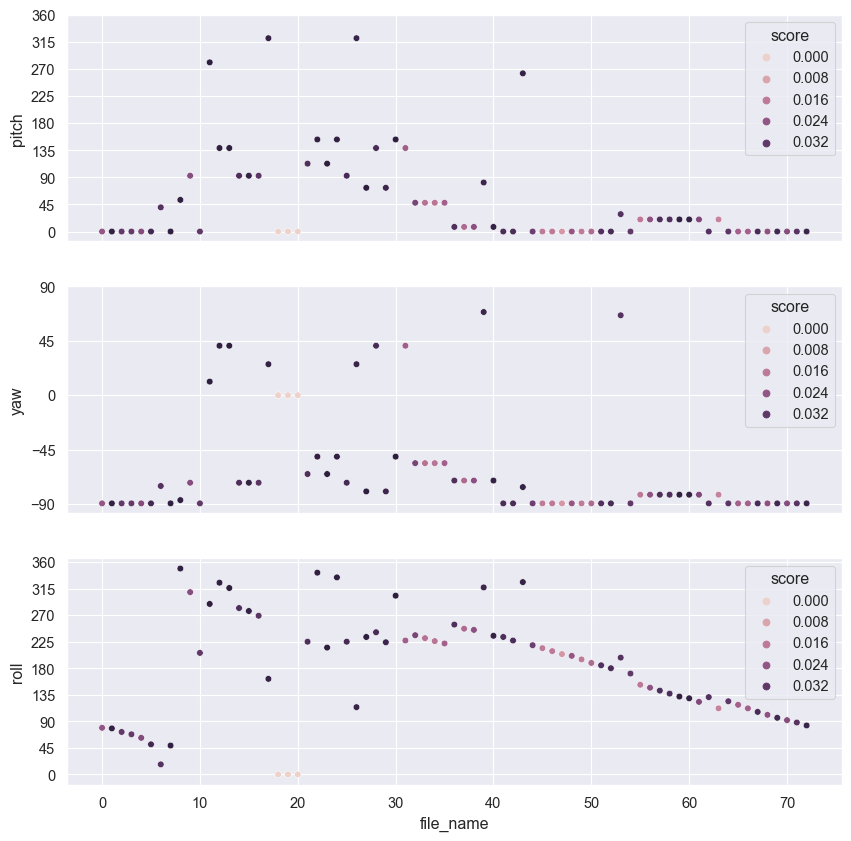

In [72]:
# plot roll, pitch, yaw in subplots with score as hue and file_name as x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df_best, x='file_name', y='pitch', hue='score');
axes[0].set_yticks(range(0, 361, 45));
sns.scatterplot(ax=axes[1], data=df_best, x='file_name', y='yaw', hue='score');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df_best, x='file_name', y='roll', hue='score');
axes[2].set_yticks(range(0, 361, 45));

In [73]:
df_copy.sort_values(by='max_val').groupby('file_name').last()

,rotation,max_val,rotation_reverse,max_val_reverse,translation,x,y,z,score,reversed_diff,...,channel,roll,pitch,yaw,channel_reverse,roll_reverse,pitch_reverse,yaw_reverse,file_name_string,unique_index
file_name,,,,,,,,,,,,,,,,,,,,,
0,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",134.026847,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",133.108588,"x: 0.98, y: 0.01, z: 21.81",0.975378,0.009379,21.810781,0.023730,-0.918259,...,rg,79,0.0,-89.55,rg,79,0.0,-89.55,A240105_15331309.png,13
1,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",124.707118,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",124.221660,"x: 0.97, y: -0.06, z: 21.67",0.969299,-0.055921,21.674833,0.038705,-0.485458,...,rg,78,0.0,-89.55,rg,78,0.0,-89.55,A240105_15341532.png,82
2,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",147.878101,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",145.834221,"x: 0.97, y: -0.11, z: 22.01",0.974746,-0.113563,22.008271,0.031543,-2.043880,...,rg,72,0.0,-89.55,rg,72,0.0,-89.55,A240105_15344411.png,94
3,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",137.913590,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",136.963168,"x: 0.94, y: -0.18, z: 21.55",0.935887,-0.176058,21.549326,0.031317,-0.950422,...,rg,68,0.0,-89.55,rg,68,0.0,-89.55,A240105_15350958.png,141
4,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",149.244852,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",149.098240,"x: 0.92, y: -0.23, z: 21.64",0.921071,-0.232594,21.636611,0.026336,-0.146612,...,rg,62,0.0,-89.55,rg,62,0.0,-89.55,A240105_15353664.png,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",146.047472,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",144.111639,"x: 0.93, y: 0.25, z: 21.96",0.934659,0.254907,21.955819,0.025043,-1.935833,...,rg,101,0.0,-89.55,rg,101,0.0,-89.55,A240105_16051481.png,1545
69,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",131.320543,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",130.356954,"x: 0.94, y: 0.19, z: 21.69",0.942116,0.186558,21.692739,0.036387,-0.963589,...,rg,96,0.0,-89.55,rg,96,0.0,-89.55,A240105_16054076.png,1632
70,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",125.033508,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",124.451909,"x: 0.95, y: 0.13, z: 21.69",0.951260,0.130565,21.688553,0.025986,-0.581599,...,rg,92,0.0,-89.55,rg,92,0.0,-89.55,A240105_16060703.png,1665


In [74]:
# while True:
#     df_best = df_copy.sort_values(by='max_val').groupby('file_name').last()
#     df_best['pitch_diff'] = df_best['pitch'].diff().abs()
#     df_best.iloc[0]['pitch_diff'] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']
#     df_best['pitch_diff'] = df_best['pitch_diff'].apply(lambda x: x if x < 180 else 360 - x)
#
#     if df_best['pitch_diff'].max() < 40:
#         break
#     else:
#         # find the first index which has pitch_diff > 40
#         # idx = df_best[df_best['pitch_diff'] > 40].index[0]
#         idx = df_best['pitch_diff'].idxmax()
#         unique = df_best.loc[idx]['unique_index']
#         df_copy = df_copy.drop(unique)

In [76]:
len(df_best.index.unique())

73

In [77]:
# only keep 'file_name', 'score', 'pitch', 'yaw', 'roll' columns
df_small = df_best[['file_name_string', 'score', 'pitch', 'yaw', 'roll', 'x', 'y', 'z', 'channel', 'max_val']]

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

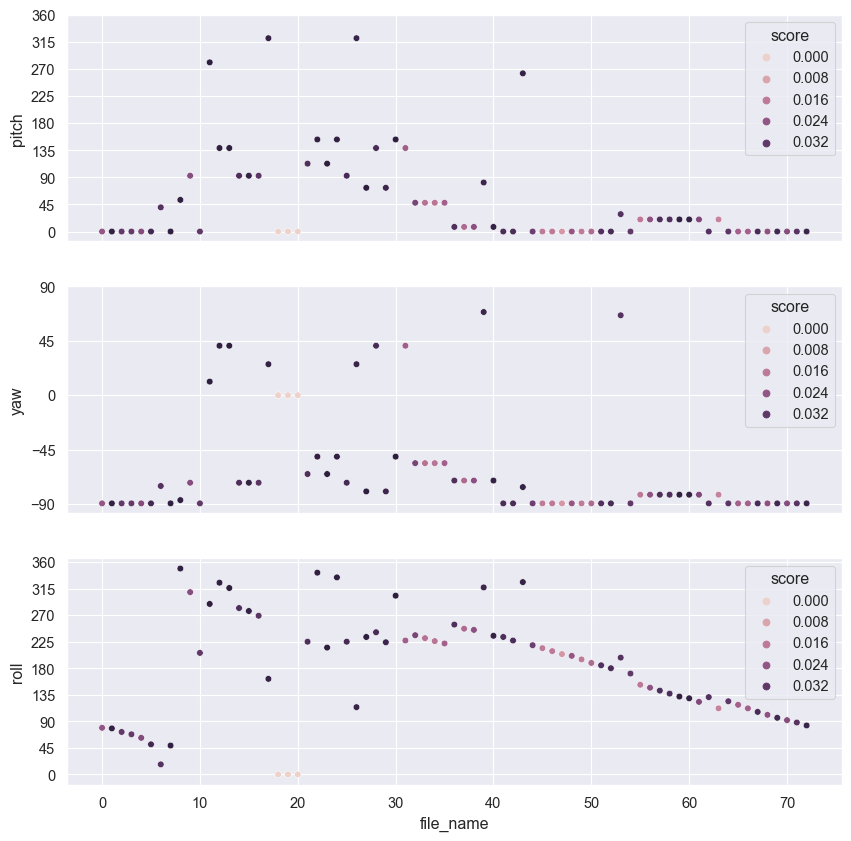

In [78]:
# plot roll, pitch, yaw in subplots with score as hue and file_name as x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df_best, x='file_name', y='pitch', hue='score');
axes[0].set_yticks(range(0, 361, 45));
sns.scatterplot(ax=axes[1], data=df_best, x='file_name', y='yaw', hue='score');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df_best, x='file_name', y='roll', hue='score');
axes[2].set_yticks(range(0, 361, 45));

In [79]:
df_small['roll'].diff().describe()

count     72.000000
mean       0.055556
std       68.597805
min     -162.000000
25%       -8.250000
50%       -5.000000
75%        0.000000
max      300.000000
Name: roll, dtype: float64

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


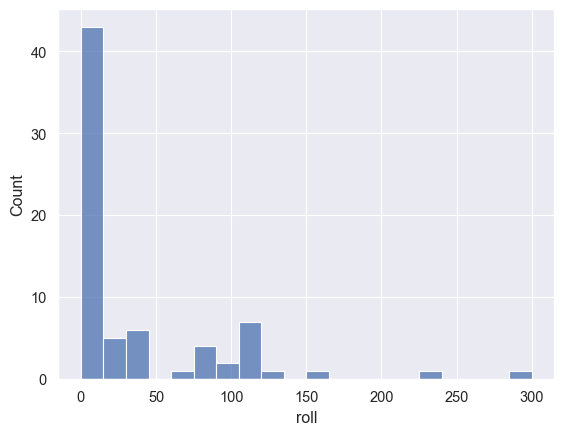

In [80]:
# find delta values for roll
# plot as histogram absoulte values
sns.histplot(df_small['roll'].diff().abs(), bins=20);

In [81]:
df_small.drop(['channel', 'max_val'], axis=1).to_csv("best_scores.csv")

In [98]:
import cv2 as cv

In [176]:
# go trough all files in folder and according to the channel in df_small replace the file with only the channel
dir = 'matching images roll'
for file in os.listdir(dir):
    try:
        if file.endswith('.png'):
            channel = df_small['channel'][int(file[:file.find('.')])]
            img = cv.imread(dir + "/" + file)
            blue_channel, green_channel, red_channel = cv.split(img)
            if channel == "rgb":
                img = cv.add(red_channel, cv.add(blue_channel, green_channel))
                cv.imwrite(dir + "/" + file, img)
            elif channel == "rg":
                img = cv.add(red_channel, green_channel)
                cv.imwrite(dir + "/" + file, img)
            elif channel == "rb":
                img = cv.add(red_channel, blue_channel)
                cv.imwrite(dir + "/" + file, img)
            elif channel == "gb":
                img = cv.add(green_channel, blue_channel)
                cv.imwrite(dir + "/" + file, img)
    except:
        print("could not find file " + file)
